In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import urllib.request

In [43]:
file_name = 'netflix_titles_2024.csv'

def download_file(file_name):
    print('Descargando el dataset')
    url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR7zAlFlUA5ATmyyNh5aK-GSh1wGIGNWzFr4DP-9yc69_4sn529kg7eFIJkL5ANOTGk2QzQ4TZ1ztFY/pub?gid=2062944849&single=true&output=csv'
    urllib.request.urlretrieve(url, file_name)
download_file(file_name)

Descargando el dataset


In [44]:
data_netflix = pd.read_csv(file_name)
data_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [45]:
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [46]:
data_netflix.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [ ]:
data_netflix.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [47]:
data_netflix['director'].fillna('Unknown', inplace=True)
data_netflix['cast'].fillna('Unknown', inplace=True)
data_netflix['country'].fillna('Unknown', inplace=True)

1. **Análisis de Duración:**
    - Determina la distribución de la duración de los títulos (películas y series). Utiliza histogramas y box plots para visualizar la distribución.

In [48]:
#Extraemos la duracion de las movies y convertimos a float
duration_movies = data_netflix[data_netflix['type']=='Movie']['duration'].str.extract('(\d+)').astype(float)
duration_movies
avg_min_movies = np.mean(duration_movies).round(2)
print('Una películas en Netflix dura en promedio ' + str(avg_min_movies) + ' minutos')

Una películas en Netflix dura en promedio 99.58 minutos


In [49]:
#Extraemos la cantidad de temporadas que tienen las series
duration_series = data_netflix[data_netflix['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)
avg_duration_series = np.mean(duration_series.dropna()).round(2)
print('Una serie de Netflix tiene en promedio ' + str(avg_duration_series)+ ' temporadas')

Una serie de Netflix tiene en promedio 1.76 temporadas


In [50]:
# Distribucion de la duracion de películas usando un histograma interactivo de Plotly
fig = px.histogram(duration_movies,
                   x=0,
                   nbins=50,
                   title='Movie duration (minutes)',
                   labels={'0': 'Movie duration'},
                   marginal="box")

fig.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    xaxis_title_font=dict(size=18, family='Arial', color='black'),
    yaxis_title_font=dict(size=18, family='Arial', color='black'),
    bargap=0.1
)

fig.show()

In [51]:
# Distribucion de la duracion de Series
fig = px.histogram(duration_series,
                   x=0,
                   nbins=50,
                   title='Series Duration (Seasons)',
                   labels={'0': 'Series Duration'},
                   marginal="box",
                   color_discrete_sequence=['#f72585'])

fig.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    xaxis_title_font=dict(size=18, family='Arial', color='black'),
    yaxis_title_font=dict(size=18, family='Arial', color='black'),
    bargap=0.1
)

In [52]:
duration_movies['type'] = 'Movie'
duration_series['type'] = 'Serie'
#Combinamos las duraciones en un solo df
combined_df = pd.concat([duration_movies, duration_series])
combined_df

,0,type
0,90.0,Movie
6,91.0,Movie
7,125.0,Movie
9,104.0,Movie
12,127.0,Movie
...,...,...
8796,2.0,Serie
8797,3.0,Serie
8800,1.0,Serie
8803,2.0,Serie


In [53]:
# Distribucion de la duracion de movies con un boxplot
fig = px.box(duration_movies,
             y=0,
             title='Movie Duration (Minutes)',
             labels={'0': 'Movie Duration'},
             width=800,
             height=600)

fig.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    yaxis_title_font=dict(size=18, family='Arial', color='black'),
)

fig.show()

In [54]:
# Distribucion de la duracion de movies con un boxplot
fig = px.box(duration_series,
             y=0,
             title='Serie Duration (Seassons)',
             labels={'0': 'Serie Duration'},
             width=800,
             height=600,
             color_discrete_sequence=['#f72585']
             )


fig.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    yaxis_title_font=dict(size=18, family='Arial', color='black'),
)

fig.show()

2. **Análisis de Tendencias:**
    - Identifica tendencias en el tiempo, como el incremento o decremento de títulos en función del año.

In [55]:
# Convierto la columna date_added en formato datetime para extraer el año
data_netflix['date_added'] = pd.to_datetime(data_netflix['date_added'])
data_netflix['year_added'] = data_netflix['date_added'].dt.year
data_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [56]:
#Conteo de series y peliculas por año
movies_per_year = data_netflix[data_netflix['type'] == 'Movie']['year_added'].value_counts()
series_per_year = data_netflix[data_netflix['type'] == 'TV Show']['year_added'].value_counts()

In [ ]:
df_counts = pd.DataFrame({'Movies': movies_per_year, 'Series': series_per_year})
df_counts = df_counts.fillna(0)
df_counts['total_by_year'] = df_counts.sum(axis=1)

#Ordenamiento
df_counts = df_counts.sort_index()

# Reseteo del indice
df_counts.reset_index(inplace=True)
df_counts.rename(columns={'index': 'year_added'}, inplace=True)

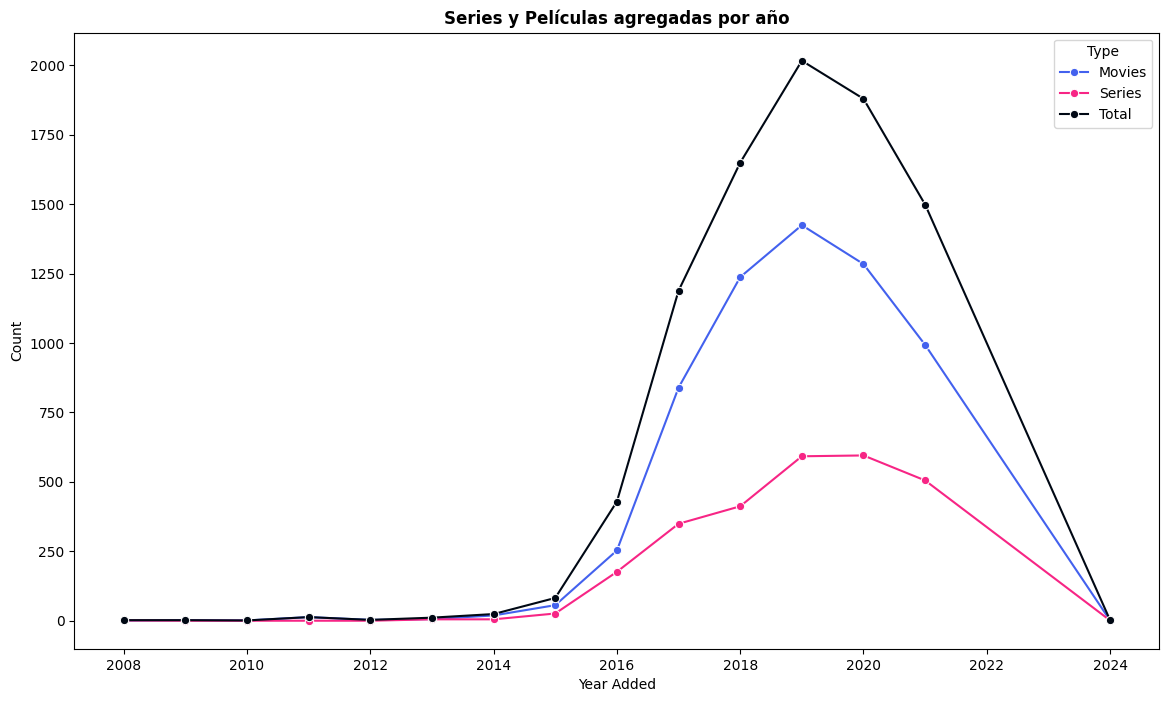

In [57]:
#Grafico de evolucion mensual de la cantidad de peliculas y series agregadas por año, usando Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_counts, x='year_added', y='Movies', label='Movies', marker='o', color='#4361ee')
sns.lineplot(data=df_counts, x='year_added', y='Series', label='Series', marker='o', color='#f72585')
sns.lineplot(data=df_counts, x='year_added', y='total_by_year', label='Total', marker='o', color='#000814')

plt.title('Series y Películas agregadas por año', fontweight='bold')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type')

plt.show()


*   El máximo de contenido global de Netflix se alcanzó en 2019.
*   Al parecer, Netflix ha puesto más énfasis en incrementar la cantidad de películas en comparación con las series de televisión. El crecimiento de las películas ha sido significativamente mayor que el de las series.